In [30]:
#importing libraries
import pandas as pd
import numpy as np
from os import makedirs
from os import path
import math
from scipy.sparse import csr_matrix
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk.downloader
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pydataset import data
from sklearn.ensemble        import BaggingClassifier, \
         ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm             import SVC
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#2: news - factual news about the climate change
#1: pro - support the belief that climate change is caused by the man-kinds.
#0: neutral
#-1: anti - refuse the belief that climate change is caused by the man-kinds

DATA="Datasets/twitter_sentiment_data.csv"
df = pd.read_csv(DATA)



In [31]:
label = [-1, 0, 1, 2]
labelN = ["Anti", "Neutral", "Pro", "News"]
labelDesc = [
    "the tweet does not believe in man-made climate change"
    , "the tweet neither supports nor refutes the belief of man-made climate change"
    , "the tweet supports the belief of man-made climate change"
    , "the tweet links to factual news about climate change"
]

labelDf = pd.DataFrame(list(zip(label, labelN, labelDesc)), columns=["label", "name", "description"])

In [32]:
df.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting hustle as it was global warming but the p...,792927353886371840
1,1,"RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world...",793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of cl...",793125156185137153


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


<AxesSubplot: >

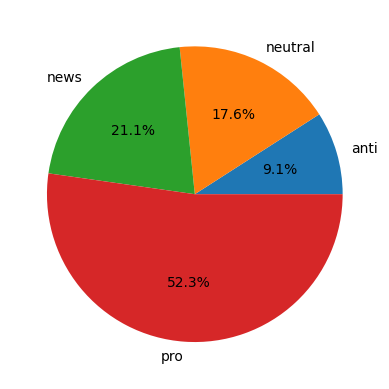

In [34]:
df2=df.copy()
#create a pie chart that shows tweets about
df2['sentiment'] = df['sentiment'].map({-1: 'anti', 0: 'neutral', 1:'pro',2:'news'})
df2.groupby('sentiment').size().plot(kind='pie', autopct='%2.1f%%')


In [35]:
a=df2.sentiment.value_counts().tolist()


print(str(a[0])+ " person support the belief that climate change is caused by the man-kinds.")
print(str(a[1])+ " factual news about the climate change")
print(str(a[2])+ " tweet is neutral") 
print(str(a[3])+ " person refuse the belief that climate change is caused by the man-kinds")

22962 person support the belief that climate change is caused by the man-kinds.
9276 factual news about the climate change
7715 tweet is neutral
3990 person refuse the belief that climate change is caused by the man-kinds


<AxesSubplot: title={'center': 'tweets about'}, xlabel='sentiment'>

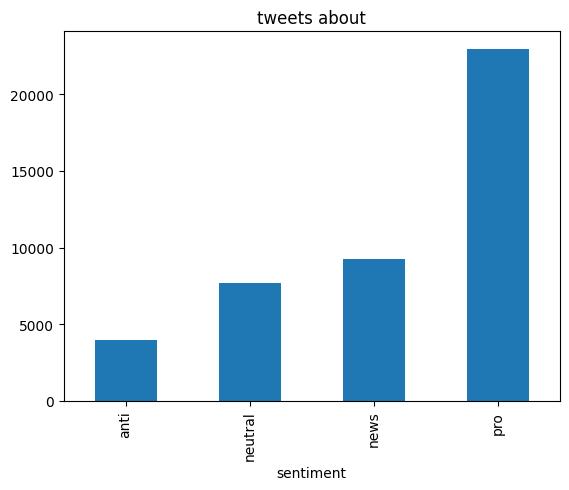

In [36]:
#number of tweets about x
df2.groupby(['sentiment']).size().plot(kind="bar",title="tweets about")


In [37]:
dfTweets=df["message"]
# dfTokenized=createTokenizedArray(dfTweets)

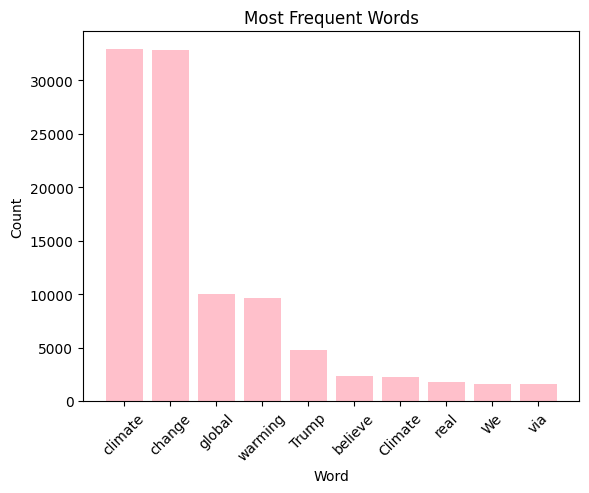

In [38]:
def plot_word_counts(strings):
    tokenizer = RegexpTokenizer(r'\w+')
    stopwords_set = set(stopwords.words('english'))
    #extracting the stopwords from tokens
    words = [word for string in strings for word in tokenizer.tokenize(string) if word not in stopwords_set and word!= "https"and
     word!= "co"and word!= "â"and word!= "Â"and word!= "the"and word!= "The"and word!= "q"and word!= "I"and word!= "RT"and word!= "http"
     and word!= "amp"]
    word_counts = Counter(words)
    sorted_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    words, counts = zip(*sorted_counts)
    color = 'pink'  # Change the color to pink
    plt.bar(words[:10], counts[:10], color=color)  # Pass the color value to the color parameter
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.title('Most Frequent Words')
    plt.xticks(rotation=45)
    
    plt.show()

plot_word_counts(dfTweets)

In [39]:

comments = df['message']
sentiments = df['sentiment']

# Create a TfidfVectorizer to extract features from the comments
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comments)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, sentiments, test_size=0.2)

# Train a Logistic Regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\burka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
#testing the classification
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.77      0.36      0.50       771
           0       0.65      0.43      0.51      1561
           1       0.74      0.89      0.81      4635
           2       0.75      0.76      0.76      1822

    accuracy                           0.73      8789
   macro avg       0.73      0.61      0.64      8789
weighted avg       0.73      0.73      0.72      8789



In [41]:
#Testing the classification and ML section
comment = "I believe climate change is human made"
comment = comment.lower()
stop_words = ['a', 'an', 'the']
comment = re.sub(r'[^\w\s]', '', comment)
comment = " ".join([word for word in comment.split() if word not in stop_words])

# Extract features from the comment using the TfidfVectorizer
comment_features = vectorizer.transform([comment])

# Make a prediction on the comment using the Logistic Regression model
prediction = model.predict(comment_features)
print("Prediction for 'I believe climate change is human made ' :", prediction)

Prediction: [1]
